In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the Titanic dataset (adjust the path if needed)
file_path = 'train.csv'
data = pd.read_csv(file_path)



### Data Cleaning Steps:
1. Handle missing values
2. Convert categorical features to numerical if necessary
3. Remove duplicates if any

In [3]:


# Step 1: Checking for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Fill missing values for 'Age' with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Dropping the 'Cabin' column since many values are missing
data.drop('Cabin', axis=1, inplace=True)



Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Step 2: Convert categorical features 'Sex' and 'Embarked' to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})



In [5]:
# Step 3: Remove duplicates if any
data.drop_duplicates(inplace=True)

# Data Cleaning Summary
print("\nData types after cleaning:")
print(data.info())




Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.5+ KB
None


### Exploratory Data Analysis (EDA)

In [6]:


# Summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())





Summary Statistics:
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    0.361392  
std      1.102743    0.806057   49.693429    0.635673  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    0.000000  
50%      0.0

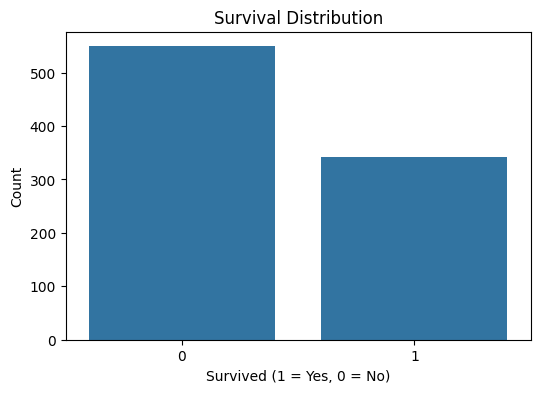

In [7]:
# Survival distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()



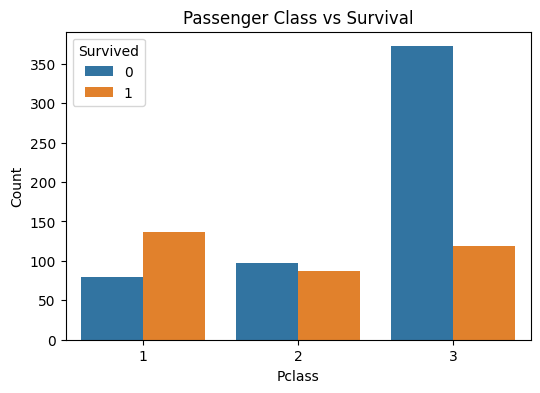

In [8]:
# Pclass vs Survival
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Passenger Class vs Survival')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()



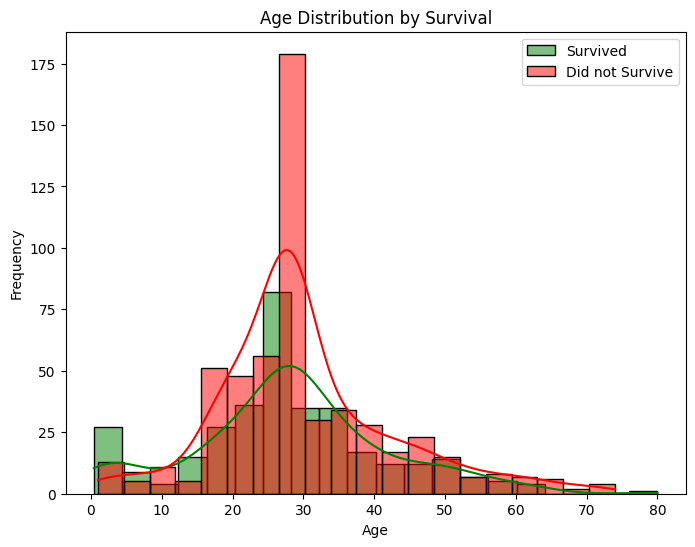

In [9]:
# Age distribution by survival
plt.figure(figsize=(8,6))
sns.histplot(data[data['Survived'] == 1]['Age'], kde=True, color='green', label='Survived', bins=20)
sns.histplot(data[data['Survived'] == 0]['Age'], kde=True, color='red', label='Did not Survive', bins=20)
plt.legend()
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



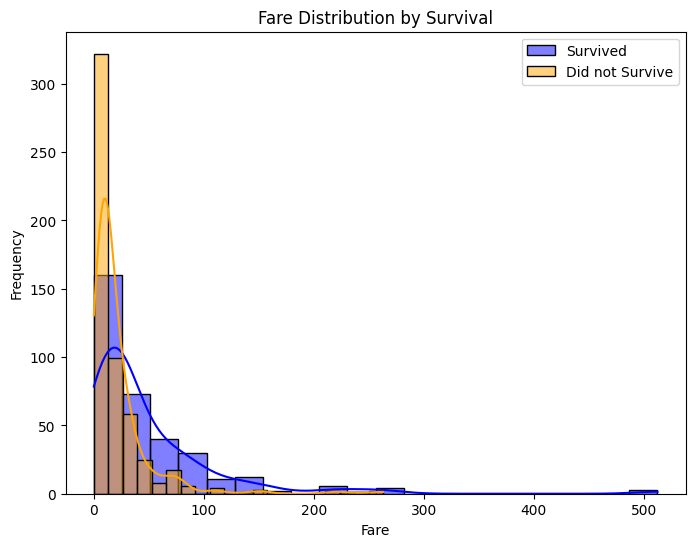

In [10]:
# Fare distribution by survival
plt.figure(figsize=(8,6))
sns.histplot(data[data['Survived'] == 1]['Fare'], kde=True, color='blue', label='Survived', bins=20)
sns.histplot(data[data['Survived'] == 0]['Fare'], kde=True, color='orange', label='Did not Survive', bins=20)
plt.legend()
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()



C:\Users\ARIFr\AppData\Local\Temp\ipykernel_10496\2224463591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


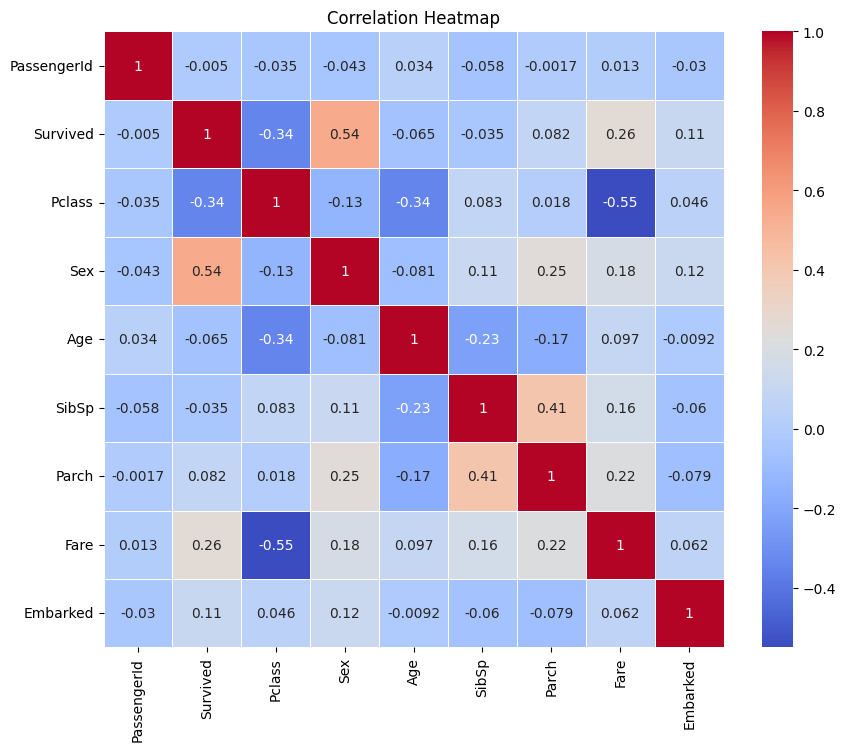

In [11]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



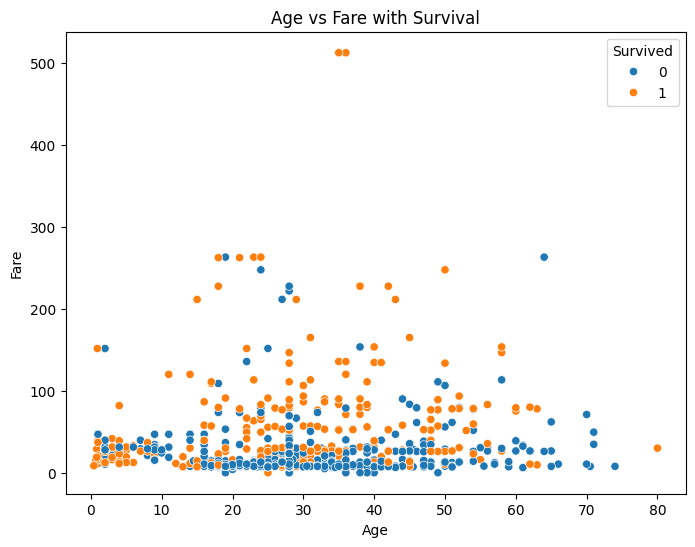

In [12]:
# Exploring the relationship between Age and Fare
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Age vs Fare with Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()